In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

import statsmodels.api as sm

In [2]:
def metric(y_test, y_hat, log=False):
    MSE  = mean_squared_error(y_test, y_hat)
    RMSE = sqrt(MSE)
    MAE  = mean_absolute_error(y_test, y_hat)
    MAPE = mean_absolute_percentage_error(y_test, y_hat)
    R2   = r2_score(y_test, y_hat)
    
    if log:
        print(f'\
MSE...............{MSE:.4f}\n\
RMSE..............{RMSE:.4f}\n\
MAE...............{MAE:.4f}\n\
MAPE..............{MAPE:.4f}\n\
R2................{R2:.4f}\
              ')
    
    return [MSE, RMSE, MAE, MAPE, R2]

In [3]:
# загрузка датасета
df = pd.read_pickle(f"DATASET\\experiment_rsv.pkl")
df['ats'] = df['ats'].rolling(5).mean()
df['rsv'] = df['rsv'].rolling(5).mean()
df = df.dropna()
df

,rsv,ats,price,month,day,day_of_week,year,index,workday,weekend,shortday,holiday,T2M,load_planned_sobr,load_actual_sobr,generate_planned_sobr,generate_actual_sobr
2014-01-01 04:00:00,717.123975,713.511987,1848.560059,1.0,1.0,2.0,2014.0,4.0,0.0,0.0,0.0,1.0,-10.310000,3518.000000,3407.000000,2255.000000,2255.000000
2014-01-01 05:00:00,715.164868,709.313989,1845.310059,1.0,1.0,2.0,2014.0,5.0,0.0,0.0,0.0,1.0,-10.420000,3586.000000,3439.000000,2255.000000,2279.000000
2014-01-01 06:00:00,716.528381,709.229980,1854.349976,1.0,1.0,2.0,2014.0,6.0,0.0,0.0,0.0,1.0,-10.510000,3520.000000,3472.000000,2204.000000,2236.000000
2014-01-01 07:00:00,717.919177,709.481982,1847.910034,1.0,1.0,2.0,2014.0,7.0,0.0,0.0,0.0,1.0,-10.600000,3528.000000,3556.000000,2178.000000,2190.000000
2014-01-01 08:00:00,721.534302,713.453992,1861.369995,1.0,1.0,2.0,2014.0,8.0,0.0,0.0,0.0,1.0,-10.740000,3517.000000,3573.000000,2219.000000,2209.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 19:00:00,1243.473633,1488.076025,3644.979980,7.0,31.0,6.0,2022.0,73003.0,0.0,1.0,0.0,0.0,17.730000,3164.051025,3228.692383,2015.900024,2022.295288
2022-07-31 20:00:00,1224.521216,1499.180005,3627.510010,7.0,31.0,6.0,2022.0,73004.0,0.0,1.0,0.0,0.0,17.280001,3087.885010,3030.164795,2025.900024,2023.476807
2022-07-31 21:00:00,1196.097412,1489.583984,3529.770020,7.0,31.0,6.0,2022.0,73005.0,0.0,1.0,0.0,0.0,16.889999,3038.926025,3048.412842,1995.900024,2015.290894
2022-07-31 22:00:00,1152.519214,1449.439990,3393.550049,7.0,31.0,6.0,2022.0,73006.0,0.0,1.0,0.0,0.0,16.690001,3041.237061,3036.188232,1995.900024,1996.080444


In [4]:
#baseline решение
data = pd.read_pickle(f"DATASET\\experiment_rsv.pkl")
decomposition = sm.tsa.seasonal_decompose(data['ats'].loc['2022-06'], model = 'additive', period=24)

baseline = pd.DataFrame()
baseline['yact'] = data['ats'].iloc[-720:].copy()

baseline['yhat'] = decomposition.trend.mean() + decomposition.seasonal.values
baseline = baseline.reset_index().drop(columns='index')
baseline

,yact,yhat
0,955.219971,845.605001
1,954.460022,847.987571
2,951.619995,860.870299
3,933.419983,882.664826
4,1011.890015,936.274412
...,...,...
715,1511.290039,1204.682304
716,1493.819946,1110.577659
717,1396.079956,1043.165239
718,1259.859985,953.894014


In [2]:
transformer = pd.read_pickle(f"DATASET\\FORECAST\\transformer.pkl")
lstm = pd.read_pickle(f"DATASET\\FORECAST\\LSTM.pkl")
lstm_trend = pd.read_pickle(f"DATASET\\FORECAST\\LSTM_trend.pkl").shift(-12).dropna()
seq2seq = pd.read_pickle(f"DATASET\\FORECAST\\seq2seq.pkl")
mlp = pd.read_pickle(f"DATASET\\FORECAST\\ann_regression.pkl").shift(24).dropna()
cat = pd.read_pickle(f"DATASET\\FORECAST\\cat1month.pkl").shift(24).dropna()

In [77]:
names = ['BaseLine', 'LSTM', 'LSTM seq2seq', 'Transformer', 'MLP', 'CatBoost', 'LSTM_trend']
models = [baseline, lstm, seq2seq, transformer, mlp, cat, lstm_trend]

for data, name in zip(models, names):
    print(name)
    metric(data['yact'], data['yhat'], log=True)
    power = df['load_actual_sobr'].iloc[-len(data['yact']):].to_numpy()
    energy_cost_actual = data['yact'] * power
    energy_cost_predicted = data['yhat'] * power
    energy_cost_actual = energy_cost_actual.sum()
    energy_cost_predicted = energy_cost_predicted.sum()
    print(f'(y_act - y_hat) / y_hat = {((energy_cost_actual-energy_cost_predicted)/energy_cost_predicted)*100:.2f}%')
    print('\n')

BaseLine
MSE...............34922.8332
RMSE..............186.8765
MAE...............128.3507
MAPE..............0.0951
R2................0.4434              
(y_act - y_hat) / y_hat = 10.06%


LSTM
MSE...............80590.2630
RMSE..............283.8842
MAE...............242.9176
MAPE..............0.1812
R2................-0.6392              
(y_act - y_hat) / y_hat = 23.63%


LSTM seq2seq
MSE...............50431.0222
RMSE..............224.5685
MAE...............178.7988
MAPE..............0.1311
R2................-0.0190              
(y_act - y_hat) / y_hat = 15.14%


Transformer
MSE...............45697.1376
RMSE..............213.7689
MAE...............167.4210
MAPE..............0.1252
R2................0.0839              
(y_act - y_hat) / y_hat = 11.64%


MLP
MSE...............56865.6652
RMSE..............238.4652
MAE...............192.4232
MAPE..............0.1412
R2................-0.1469              
(y_act - y_hat) / y_hat = 17.10%


CatBoost
MSE...............56937.8715
RMSE..

Text(-0.1, 0.95, 'б)')

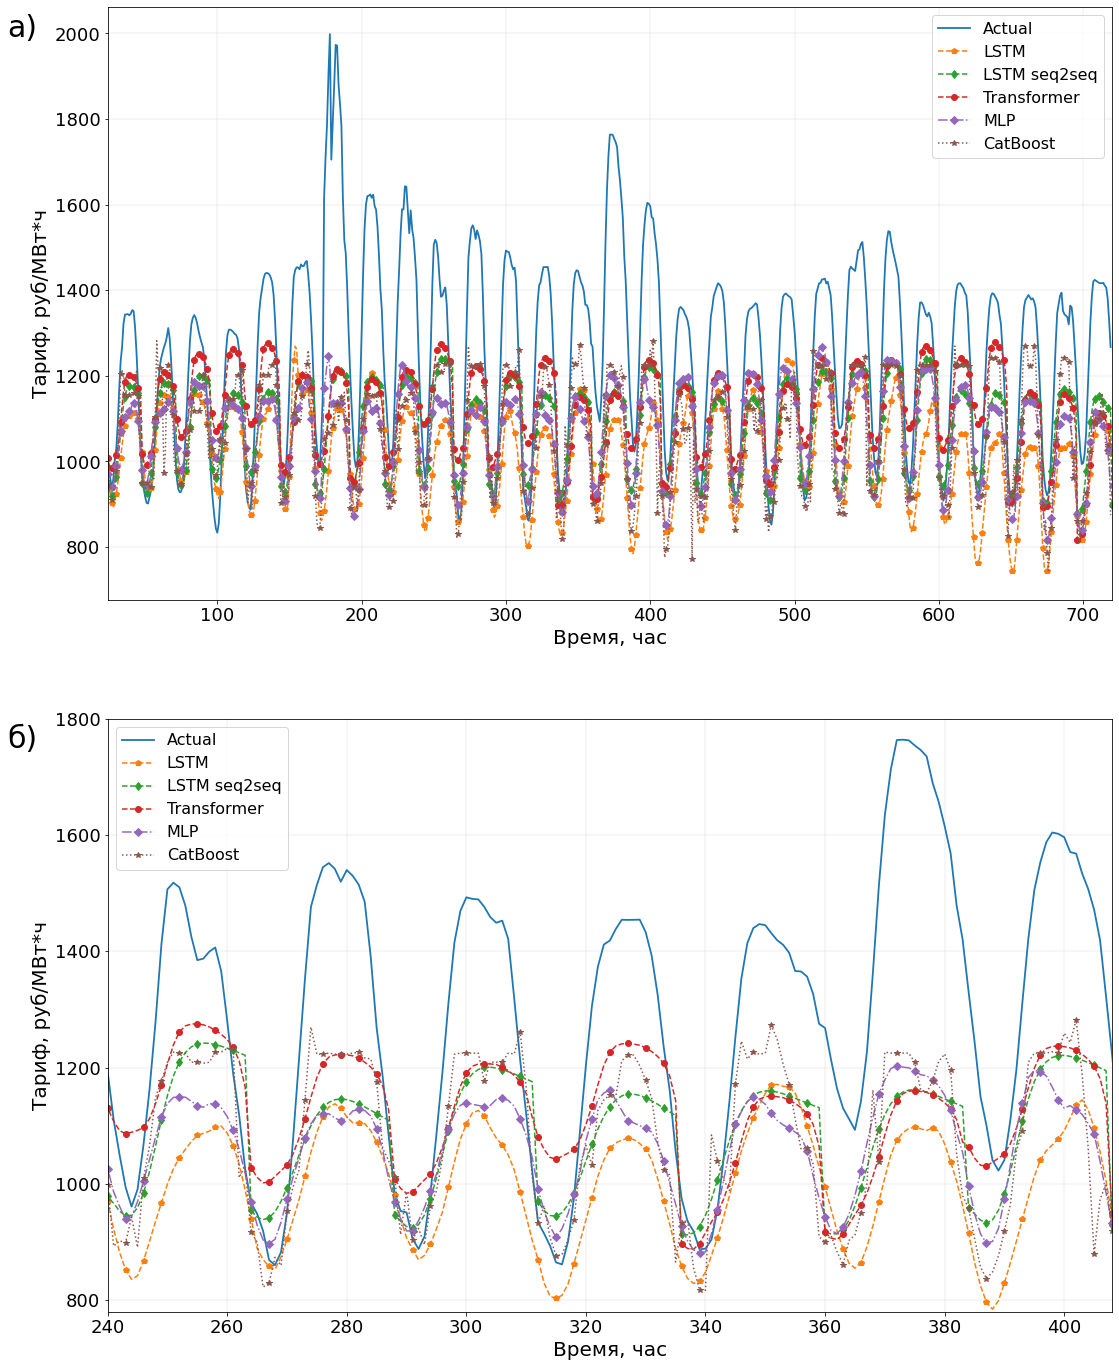

In [33]:
import matplotlib.ticker as ticker

plt.rcParams.update({'axes.titlesize': 20,
                    'xtick.labelsize': 18,
                    'ytick.labelsize': 18,
                    'legend.fontsize' : 16,
                    'axes.labelsize': 20})


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,24))

ax1.plot(transformer['yact'], label='Actual', lw=1.8)

ax1.plot(lstm['yhat'], label='LSTM', marker='p', markersize=6, markevery=3, ls='--', lw=1.5)
ax1.plot(seq2seq['yhat'], label='LSTM seq2seq', marker='d', markersize=6, markevery=3, ls='--', lw=1.5)
ax1.plot(transformer['yhat'], label='Transformer', marker='o', markersize=6, markevery=3, ls='--', lw=1.5)
ax1.plot(mlp['yhat'], label='MLP', marker='D', markersize=6, markevery=3, ls='-.', lw=1.5)
ax1.plot(cat['yhat'], label='CatBoost', marker='*', markersize=6, markevery=3, ls=':', lw=1.5)

ax1.set_xlim(24, 720)
ax1.set_xlabel('Время, час')
ax1.set_ylabel('Тариф, руб/МВт*ч')
ax1.legend(loc='upper right')
ax1.grid(lw=.2)
ax1.text(-.1, 0.95, 'a)', fontsize=30, transform=ax1.transAxes)
# # # # # # #

ax2.plot(transformer['yact'], label='Actual', lw=1.8)

ax2.plot(lstm['yhat'], label='LSTM', marker='p', markersize=6, markevery=3, ls='--', lw=1.5)
ax2.plot(seq2seq['yhat'], label='LSTM seq2seq', marker='d', markersize=6, markevery=3, ls='--', lw=1.5)
ax2.plot(transformer['yhat'], label='Transformer', marker='o', markersize=6, markevery=3, ls='--', lw=1.5)
ax2.plot(mlp['yhat'], label='MLP', marker='D', markersize=6, markevery=3, ls='-.', lw=1.5)
ax2.plot(cat['yhat'], label='CatBoost', marker='*', markersize=6, markevery=3, ls=':', lw=1.5)

ax2.set_xlim(24*10, 24*17)
ax2.set_ylim(780, 1800)
ax2.set_xlabel('Время, час')
ax2.set_ylabel('Тариф, руб/МВт*ч')
ax2.legend(loc='upper left')
ax2.grid(lw=.2)
ax2.text(-.1, 0.95, 'б)', fontsize=30, transform=ax2.transAxes)

In [43]:
clf = pd.read_pickle(f"DATASET\\classification_data.pkl")

mlp1d = pd.read_pickle(f"DATASET\FORECAST\\\MLP1day.pkl")
cat1d = pd.read_pickle(f"DATASET\\FORECAST\\cat1day.pkl")
baseline1d = pd.DataFrame({'yact' : clf['ats_price'].iloc[-720:].values,
                         'yhat' : clf['node_price'].iloc[-720:].values})

names = ['baseline', 'MLP', 'CatBoost']
models = [baseline1d, mlp1d, cat1d]

for data, name in zip(models, names):
    print(name)
    metric(data['yact'], data['yhat'], log=True)
    power = df['load_actual_sobr'].iloc[-len(data['yact']):].to_numpy()
    energy_cost_actual = data['yact'] * power
    energy_cost_predicted = data['yhat'] * power
    energy_cost_actual = energy_cost_actual.sum()
    energy_cost_predicted = energy_cost_predicted.sum()
    print(f'(y_act - y_hat) / y_hat = {((energy_cost_actual-energy_cost_predicted)/energy_cost_predicted)*100:.2f}%')
    print('\n')

baseline
MSE...............1468.6934
RMSE..............38.3235
MAE...............37.0680
MAPE..............0.0297
R2................0.9766              
(y_act - y_hat) / y_hat = -2.85%


MLP
MSE...............251.8161
RMSE..............15.8687
MAE...............10.3967
MAPE..............0.0075
R2................0.9960              
(y_act - y_hat) / y_hat = 0.41%


CatBoost
MSE...............10357.6803
RMSE..............101.7727
MAE...............29.8525
MAPE..............0.0181
R2................0.8347              
(y_act - y_hat) / y_hat = 1.90%




Text(-0.1, 0.95, 'б)')

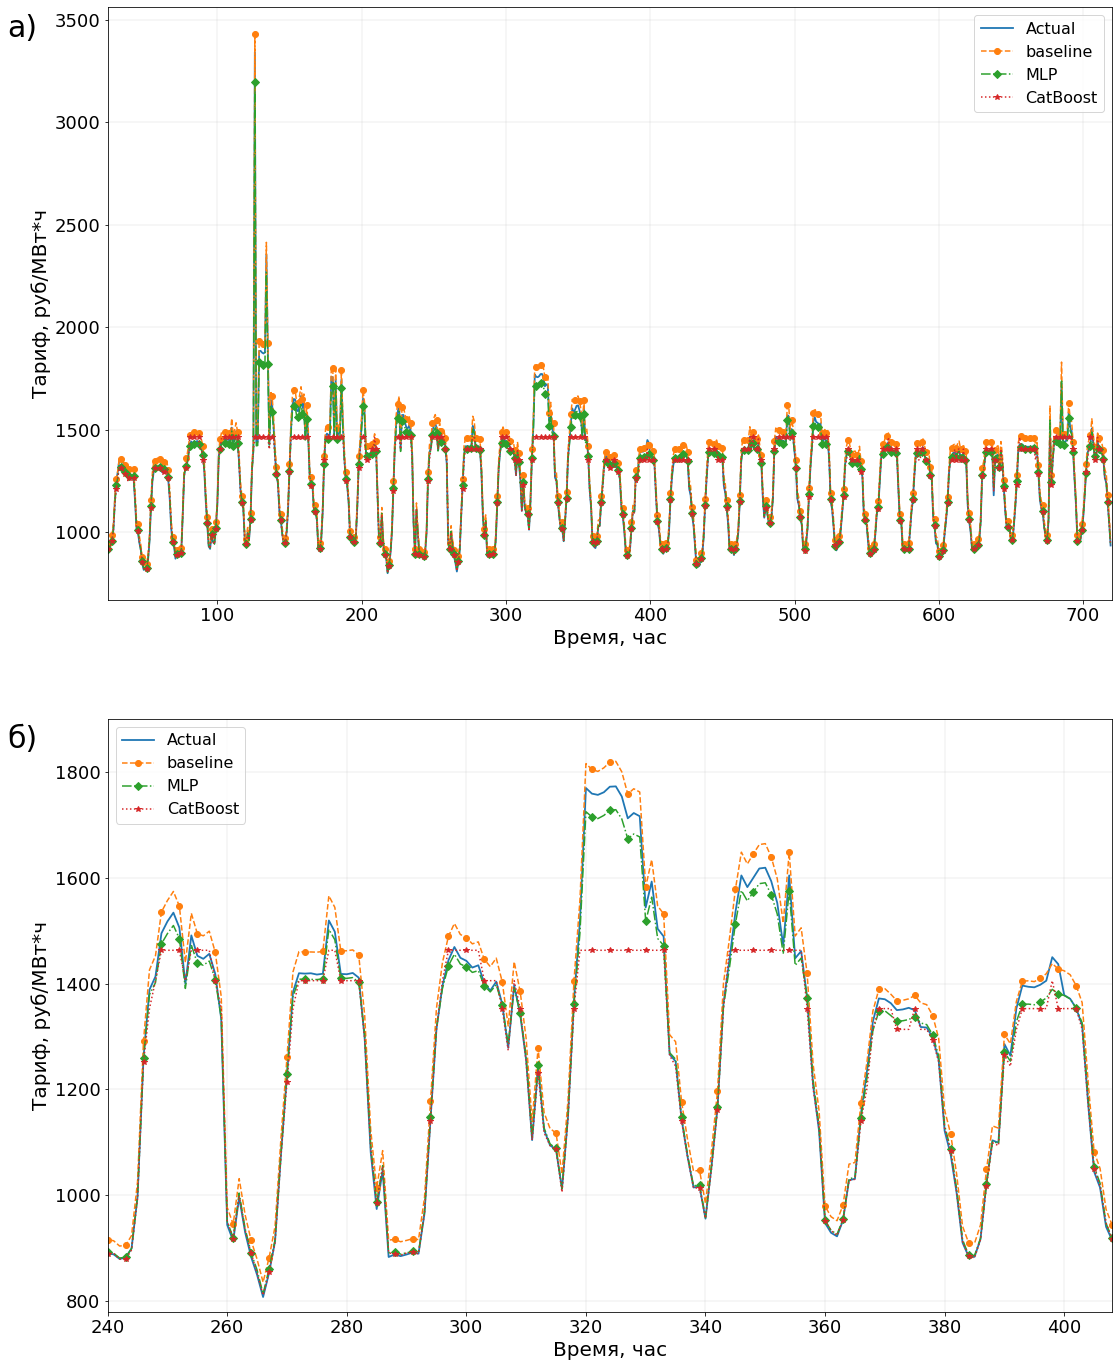

In [42]:
import matplotlib.ticker as ticker

plt.rcParams.update({'axes.titlesize': 20,
                    'xtick.labelsize': 18,
                    'ytick.labelsize': 18,
                    'legend.fontsize' : 16,
                    'axes.labelsize': 20})


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,24))

ax1.plot(baseline1d['yact'], label='Actual', lw=1.8)

ax1.plot(baseline1d['yhat'], label='baseline', marker='o', markersize=6, markevery=3, ls='--', lw=1.5)
ax1.plot(mlp1d['yhat'], label='MLP', marker='D', markersize=6, markevery=3, ls='-.', lw=1.5)
ax1.plot(cat1d['yhat'], label='CatBoost', marker='*', markersize=6, markevery=3, ls=':', lw=1.5)

ax1.set_xlim(24, 720)
ax1.set_xlabel('Время, час')
ax1.set_ylabel('Тариф, руб/МВт*ч')
ax1.legend(loc='upper right')
ax1.grid(lw=.2)
ax1.text(-.1, 0.95, 'a)', fontsize=30, transform=ax1.transAxes)
# # # # # # #

ax2.plot(baseline1d['yact'], label='Actual', lw=1.8)

ax2.plot(baseline1d['yhat'], label='baseline', marker='o', markersize=6, markevery=3, ls='--', lw=1.5)
ax2.plot(mlp1d['yhat'], label='MLP', marker='D', markersize=6, markevery=3, ls='-.', lw=1.5)
ax2.plot(cat1d['yhat'], label='CatBoost', marker='*', markersize=6, markevery=3, ls=':', lw=1.5)

ax2.set_xlim(24*10, 24*17)
ax2.set_ylim(780, 1900)
ax2.set_xlabel('Время, час')
ax2.set_ylabel('Тариф, руб/МВт*ч')
ax2.legend(loc='upper left')
ax2.grid(lw=.2)
ax2.text(-.1, 0.95, 'б)', fontsize=30, transform=ax2.transAxes)

Text(-0.1, 0.95, 'б)')

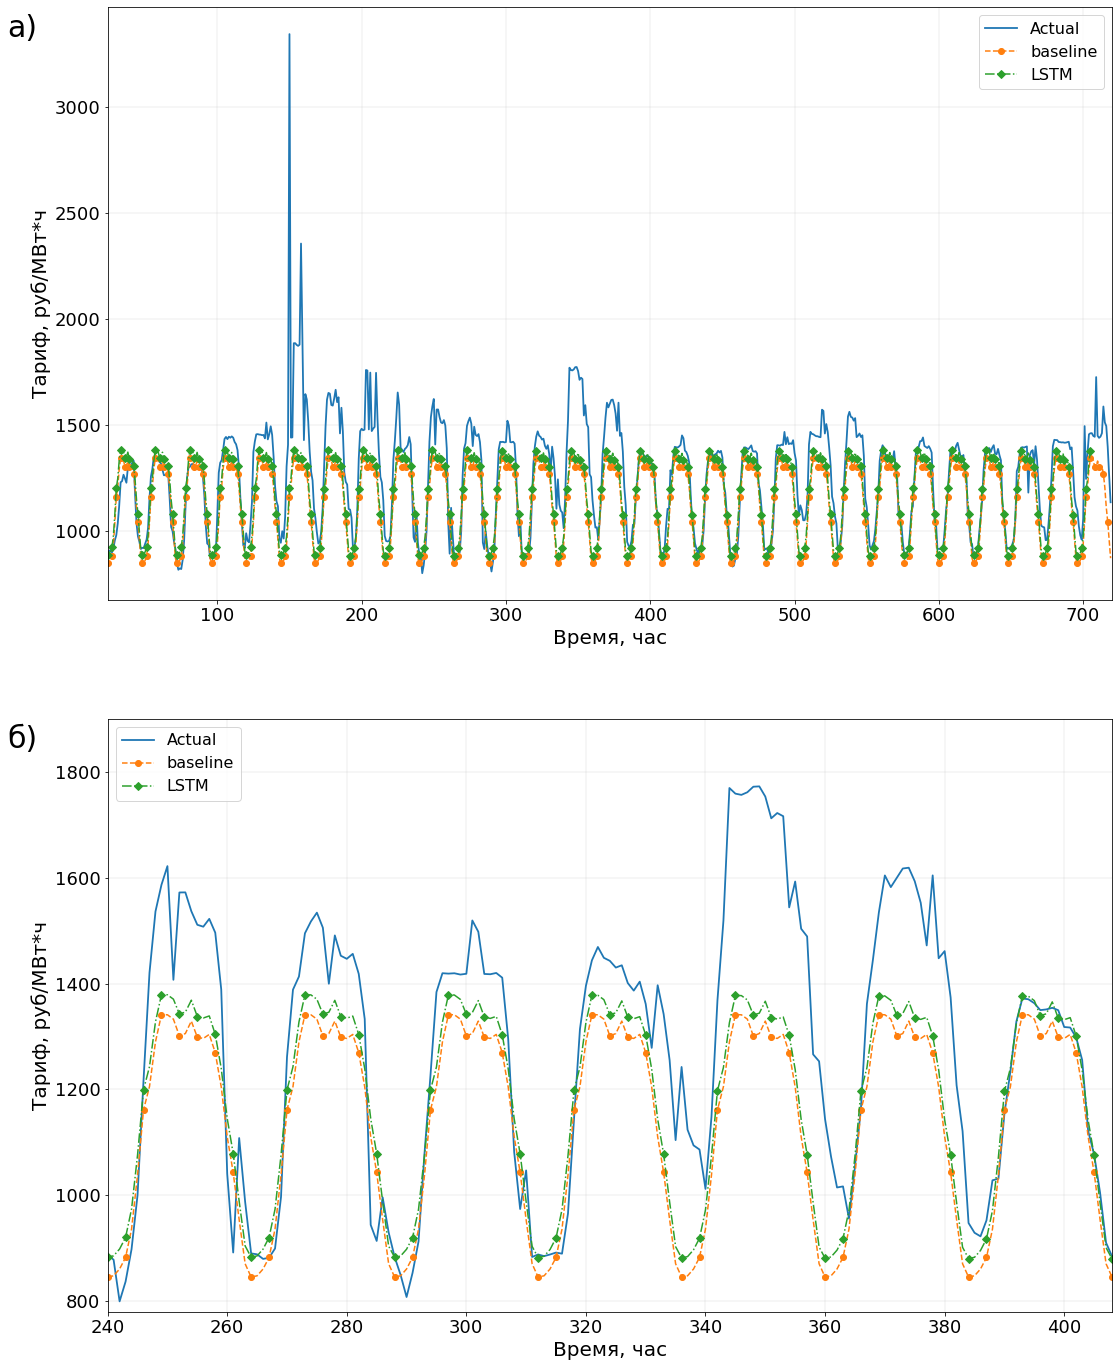

In [75]:
import matplotlib.ticker as ticker

plt.rcParams.update({'axes.titlesize': 20,
                    'xtick.labelsize': 18,
                    'ytick.labelsize': 18,
                    'legend.fontsize' : 16,
                    'axes.labelsize': 20})


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,24))

ax1.plot(baseline['yact'], label='Actual', lw=1.8)

ax1.plot(baseline['yhat'], label='baseline', marker='o', markersize=6, markevery=3, ls='--', lw=1.5)
ax1.plot(lstm_trend['yhat'], label='LSTM', marker='D', markersize=6, markevery=3, ls='-.', lw=1.5)

ax1.set_xlim(24, 720)
ax1.set_xlabel('Время, час')
ax1.set_ylabel('Тариф, руб/МВт*ч')
ax1.legend(loc='upper right')
ax1.grid(lw=.2)
ax1.text(-.1, 0.95, 'a)', fontsize=30, transform=ax1.transAxes)
# # # # # # #

ax2.plot(baseline['yact'], label='Actual', lw=1.8)

ax2.plot(baseline['yhat'], label='baseline', marker='o', markersize=6, markevery=3, ls='--', lw=1.5)
ax2.plot(lstm_trend['yhat'], label='LSTM', marker='D', markersize=6, markevery=3, ls='-.', lw=1.5)

ax2.set_xlim(24*10, 24*17)
ax2.set_ylim(780, 1900)
ax2.set_xlabel('Время, час')
ax2.set_ylabel('Тариф, руб/МВт*ч')
ax2.legend(loc='upper left')
ax2.grid(lw=.2)
ax2.text(-.1, 0.95, 'б)', fontsize=30, transform=ax2.transAxes)

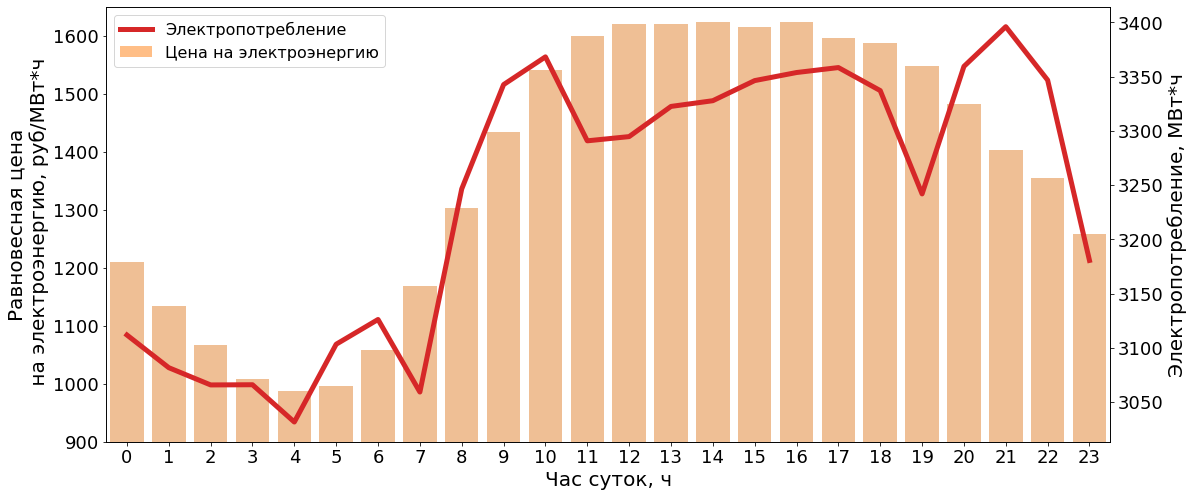

In [22]:
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

prices = df['ats'].copy().loc['2022-07-9']
power  = df['load_planned_sobr'].copy().shift(4).loc['2022-07-9']


plt.rcParams.update({'axes.titlesize': 20,
                    'xtick.labelsize': 18,
                    'ytick.labelsize': 18,
                    'legend.fontsize' : 16,
                    'axes.labelsize': 20})

fig, ax = plt.subplots(figsize=(18,8))
ax1 = ax.twinx()
sns.barplot(x=prices.index.hour,
            y=prices,
            color='tab:orange', alpha=.5,
            ax=ax)
ax1.plot(power.values,
         c='tab:red', lw=5)

ax.set_ylim(900,1650)
ax.set_xlim(-.5,23.5)

ax.set_xlabel('Час суток, ч')
ax.set_ylabel('Равновесная цена\n на электроэнергию, руб/МВт*ч')
ax1.set_ylabel('Электропотребление, МВт*ч')

legend_elements = [Line2D([0], [0], color='tab:red', lw=5, label='Электропотребление'),
                   Patch(facecolor='tab:orange', alpha=.5, label='Цена на электроэнергию')]
ax.legend(handles=legend_elements)